In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('./data/信用卡交易数据.xlsx')

In [4]:
df.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


In [5]:
X = df.drop(columns='欺诈标签')
y = df['欺诈标签']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
from xgboost import XGBClassifier  # 安装 pip install xgboost

In [8]:
clf = XGBClassifier(n_estimators=100, learning_rate=0.05)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

In [14]:
a

,预测值,实际值
0,0,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
195,0,1
196,1,1
197,0,0
198,1,1


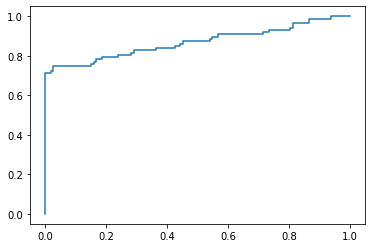

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)


In [17]:
features = X.columns
importances = clf.feature_importances_
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
0,换设备次数,0.406744
3,换IP国次数,0.333477
1,支付失败次数,0.190185
2,换IP次数,0.041010
4,交易金额,0.028585


In [18]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:0100:02


In [2]:
from lightgbm import LGBMClassifier

### XGBoost参数

![./images/IMG_1363.png](./images/IMG_1363.png)
![./images/IMG_1363.png](./images/IMG_1364.png)